# Exploratory Data Analysis (EDA)

In this notebok, we perform an Exploratory Data Analysis (EDA) on the dataset used for **Facial Recognition** and **Object Recognition** models. The goal of EDA is to understand the structure, patterns, and relationships within the data, which helps in selecting appropriate models and preprocessing techniques.

## 1. Data Overview

The dataset consists of:
- **Facial Recognition Data**: A collection of labeled face images, used to recognize different individuals.
- **Object Recognition Data**: A set of images containing multiple objects with bounding boxes and labels for classification.

### Dataset Details:
- Number of images: `100,000`
- Number of classes (for object detection and facial recognition): `10,177`
- Image resolution: `224 x 224`
- Data format: `.jpg`

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import random
import cv2    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
import os

In [2]:
# Set the path to the parent folder
parent_folder = '/mnt/c/users/efazh/DataCapstone/ProjectTortoise/data'

# List all directories in the parent folder
folders = [f for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]

# Print the contents of each folder
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    print(f"Contents of {folder}:")
    for file in os.listdir(folder_path):
        print(f"  - {file}")
    print("\n")

Contents of .ipynb_checkpoints:


Contents of ahmed:
  - 9EF9FBB4-ADED-4382-A890-91A47F02AEA2.jpg
  - IMG_3720.jpg
  - IMG_3721.jpg
  - IMG_3722.jpg
  - IMG_3723.jpg
  - IMG_3724.jpg
  - IMG_3725.jpg
  - IMG_3726.jpg
  - IMG_3729.jpg
  - IMG_3730.jpg
  - IMG_3733.jpg
  - IMG_3734.jpg
  - IMG_3735.jpg
  - IMG_3736.jpg
  - IMG_3737.jpg
  - IMG_3740.jpg
  - IMG_3741.jpg
  - IMG_3746.jpg
  - IMG_3748.jpg
  - IMG_3750.jpg
  - IMG_3752.jpg


Contents of efaz:
  - 20230116_194200.jpg
  - 20231112_204510.jpg
  - 20231112_204514.jpg
  - 20231112_204517.jpg
  - 20231112_204558.jpg
  - 20231112_204659.jpg
  - 20231112_204701.jpg
  - 20231112_204707.jpg
  - 20231112_204723.jpg
  - 20231112_204731.jpg
  - 20231112_204733.jpg
  - 20231112_204737.jpg
  - 20231112_204738.jpg
  - 20231112_204739.jpg
  - 20231112_204740.jpg
  - 20231112_204742.jpg
  - 20231112_204743.jpg
  - 20231112_204744.jpg
  - 20231112_204746.jpg
  - 20231112_204747(0).jpg
  - 20231112_204747.jpg
  - 20231112_204749.jpg
  - 2023111

## 2. Image Examples

To understand the variety of the dataset, let’s visualize a few random examples of:
- **Facial images**: Display different faces across various lighting conditions and angles.
- **Object images**: Show examples with multiple objects in a single image.

This helps to spot any anomalies or inconsistencies in image quality and labeling.

Visualizing samples from folder: steph


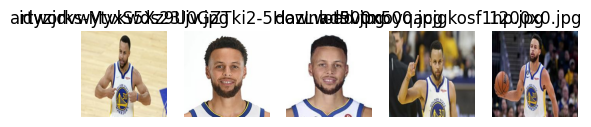

Visualizing samples from folder: kobe


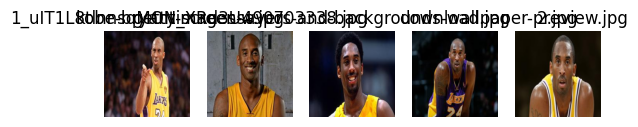

Visualizing samples from folder: .ipynb_checkpoints


In [3]:
num_samples = 5

# Function to visualize images
def visualize_samples(folder_path, num_samples):
    # Get all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Select random samples
    random_samples = random.sample(files, min(num_samples, len(files)))

    # Plot the random samples
    for i, sample in enumerate(random_samples):
        img_path = os.path.join(folder_path, sample)
        img = mpimg.imread(img_path)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(sample)

    plt.show()

# Iterate through a few folders and visualize random samples
for folder in random.sample(folders, 3):  # Selecting 3 random folders to visualize
    folder_path = os.path.join(parent_folder, folder)
    print(f"Visualizing samples from folder: {folder}")
    visualize_samples(folder_path, num_samples)

## 3. Visualizations

### Visualizing Pixel Intensity Distribution

In [4]:
def collect_pixel_intensities_rgb(folder_path):
    red_channel = []
    green_channel = []
    blue_channel = []
    
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file in files:
        img_path = os.path.join(folder_path, file)
        with Image.open(img_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_array = np.array(img)
            
            # Separate the channels
            red_channel.extend(img_array[:, :, 0].ravel())  # Red
            green_channel.extend(img_array[:, :, 1].ravel())  # Green
            blue_channel.extend(img_array[:, :, 2].ravel())  # Blue
    
    return red_channel, green_channel, blue_channel

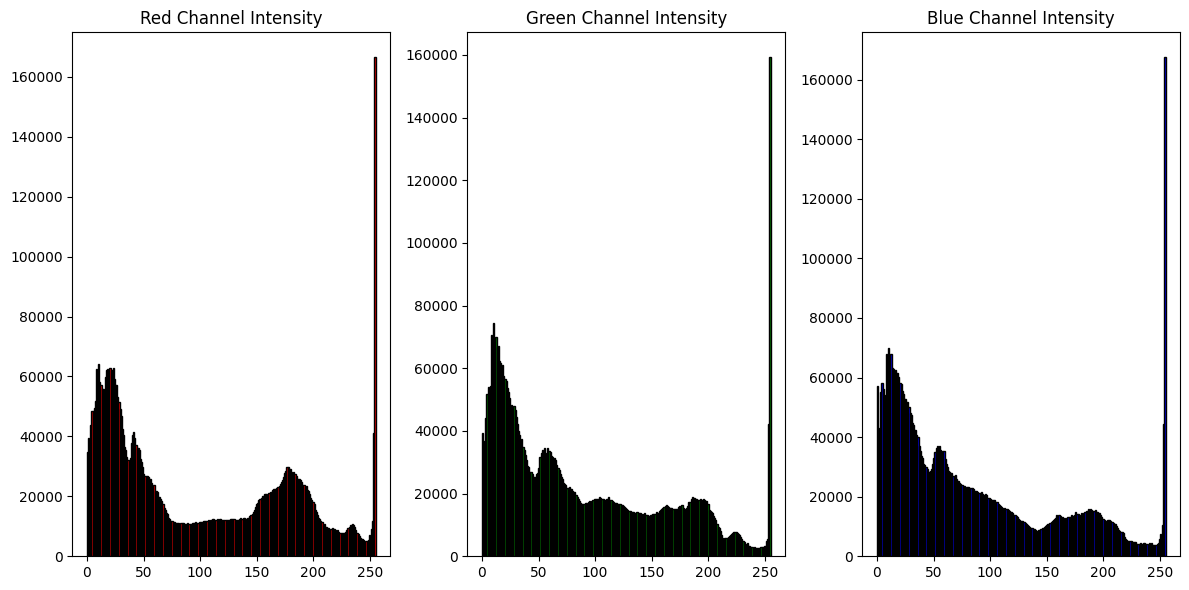

In [5]:
# Collect RGB pixel intensities
all_red, all_green, all_blue = [], [], []
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    red, green, blue = collect_pixel_intensities_rgb(folder_path)
    all_red.extend(red)
    all_green.extend(green)
    all_blue.extend(blue)

# Plot pixel intensity distributions for each color channel
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(all_red, bins=256, color='red', edgecolor='black')
plt.title('Red Channel Intensity')

plt.subplot(1, 3, 2)
plt.hist(all_green, bins=256, color='green', edgecolor='black')
plt.title('Green Channel Intensity')

plt.subplot(1, 3, 3)
plt.hist(all_blue, bins=256, color='blue', edgecolor='black')
plt.title('Blue Channel Intensity')

plt.tight_layout()
plt.show()

## 4. Image Dimensions

Check the size of the images to understand if they need resizing or preprocessing. Uniform image dimensions can help improve model performance.

- Are the images of varying resolutions?
- Do we need to standardize the image sizes before feeding them into the model?

In [6]:
# Define the target size (224x224)
target_size = (224, 224)

# Function to check and resize images if necessary
def check_and_resize_images(folder_path, target_size):
    # Get all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Iterate through each image file
    for file in files:
        img_path = os.path.join(folder_path, file)
        
        try:
            # Open the image
            with Image.open(img_path) as img:
                # Get current size
                width, height = img.size
                print(f"Image: {file}, Size: {width}x{height}")
                
                # Check if the size is different from the target size
                if (width, height) != target_size:
                    print(f"Resizing image: {file} to {target_size}")
                    # Resize the image
                    img_resized = img.resize(target_size)
                    
                    # Optionally save the resized image (overwrite or to a new folder)
                    img_resized.save(img_path)  # Overwriting the original image
        except Exception as e:
            print(f"Could not open or process {file}: {e}")

# Iterate through all folders and process images
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    print(f"Processing folder: {folder}")
    check_and_resize_images(folder_path, target_size)

Processing folder: .ipynb_checkpoints
Processing folder: ahmed
Image: 9EF9FBB4-ADED-4382-A890-91A47F02AEA2.jpg, Size: 224x224
Image: IMG_3720.jpg, Size: 224x224
Image: IMG_3721.jpg, Size: 224x224
Image: IMG_3722.jpg, Size: 224x224
Image: IMG_3723.jpg, Size: 224x224
Image: IMG_3724.jpg, Size: 224x224
Image: IMG_3725.jpg, Size: 224x224
Image: IMG_3726.jpg, Size: 224x224
Image: IMG_3729.jpg, Size: 224x224
Image: IMG_3730.jpg, Size: 224x224
Image: IMG_3733.jpg, Size: 224x224
Image: IMG_3734.jpg, Size: 224x224
Image: IMG_3735.jpg, Size: 224x224
Image: IMG_3736.jpg, Size: 224x224
Image: IMG_3737.jpg, Size: 224x224
Image: IMG_3740.jpg, Size: 224x224
Image: IMG_3741.jpg, Size: 224x224
Image: IMG_3746.jpg, Size: 224x224
Image: IMG_3748.jpg, Size: 224x224
Image: IMG_3750.jpg, Size: 224x224
Image: IMG_3752.jpg, Size: 224x224
Processing folder: efaz
Image: 20230116_194200.jpg, Size: 224x224
Image: 20231112_204510.jpg, Size: 224x224
Image: 20231112_204514.jpg, Size: 224x224
Image: 20231112_204517.j

## 5. Missing or Corrupt Data

- Are there any missing labels or images?
- Are there any corrupted files that cannot be processed?

Identifying and handling missing or corrupt data is crucial for avoiding errors during model training.

In [7]:
# Function to check for corrupt or missing data
def check_for_corrupt_images(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Lists to hold results
    corrupt_files = []
    empty_files = []

    for file in files:
        img_path = os.path.join(folder_path, file)
        
        # Check for zero-byte files
        if os.path.getsize(img_path) == 0:
            print(f"Empty file detected: {file}")
            empty_files.append(file)
            continue
        
        # Try opening the image to detect corruption
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verifies that it is an image
        except (IOError, OSError) as e:
            print(f"Corrupt image detected: {file}, Error: {e}")
            corrupt_files.append(file)

    return corrupt_files, empty_files

In [8]:
# Iterate through all folders and process images
all_corrupt_files = {}
all_empty_files = {}

for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    print(f"Checking folder: {folder}")
    corrupt_files, empty_files = check_for_corrupt_images(folder_path)
    
    # Store results
    if corrupt_files:
        all_corrupt_files[folder] = corrupt_files
    if empty_files:
        all_empty_files[folder] = empty_files

# Summary of results
print("\nSummary of Corrupt and Empty Files:")
print(f"Total folders checked: {len(folders)}")
print(f"Corrupt files found in {len(all_corrupt_files)} folders.")
print(f"Empty files found in {len(all_empty_files)} folders.")

Checking folder: .ipynb_checkpoints
Checking folder: ahmed
Checking folder: efaz
Checking folder: giannis
Checking folder: jokic
Checking folder: kobe
Checking folder: steph
Checking folder: test
Checking folder: timmy

Summary of Corrupt and Empty Files:
Total folders checked: 9
Corrupt files found in 0 folders.
Empty files found in 0 folders.


## 6. Data Augmentation Strategy

Based on the findings from the EDA, we'll outline a **Data Augmentation** strategy to improve model generalization. Techniques may include:
- **Flipping**: Horizontal or vertical flips to increase diversity.
- **Rotation**: Random rotations to simulate different perspectives.
- **Brightness and Contrast Adjustments**: To handle varying lighting conditions.
- **Zooming and Cropping**: To simulate different scales of objects and faces.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

2024-10-09 15:11:33.115624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 15:11:33.561242: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 15:11:33.564682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 15:11:35.703168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
# Function to augment and save images
def augment_and_save_images(folder_path, output_folder, num_augmented=5):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in files:
        img_path = os.path.join(folder_path, file)
        img = load_img(img_path)  # Load image using Keras
        img_array = img_to_array(img)  # Convert to numpy array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)

        # Generate augmented images and save them
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder, save_prefix=os.path.splitext(file)[0], save_format='jpg'):
            i += 1
            if i >= num_augmented:
                break  # Stop after creating 'num_augmented' images

In [11]:
# Iterate through folders and apply augmentation
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    output_folder = os.path.join(parent_folder, folder + "_augmented")  # Save to an augmented folder
    augment_and_save_images(folder_path, output_folder, num_augmented=5)

In [12]:
# Function to visualize random augmented images
def visualize_random_augmented_images(output_folder, num_samples=5):
    # Get a list of all augmented files in the output folder
    files = [f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))]

    # Randomly select a few samples from the augmented images
    random_files = random.sample(files, min(num_samples, len(files)))

    # Plot the selected augmented images
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(random_files):
        img_path = os.path.join(output_folder, file)
        img = Image.open(img_path)
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(file)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/.ipynb_checkpoints_augmented


<Figure size 1500x500 with 0 Axes>

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/ahmed_augmented


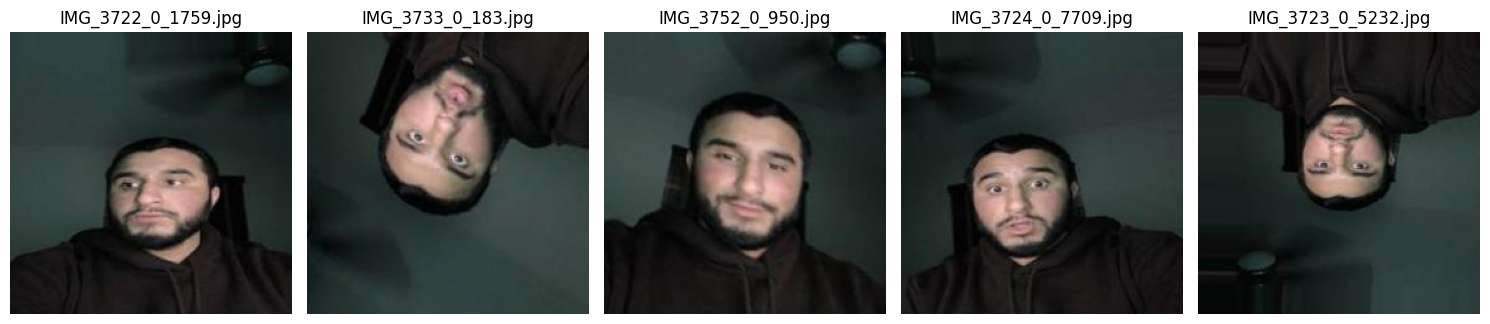

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/efaz_augmented


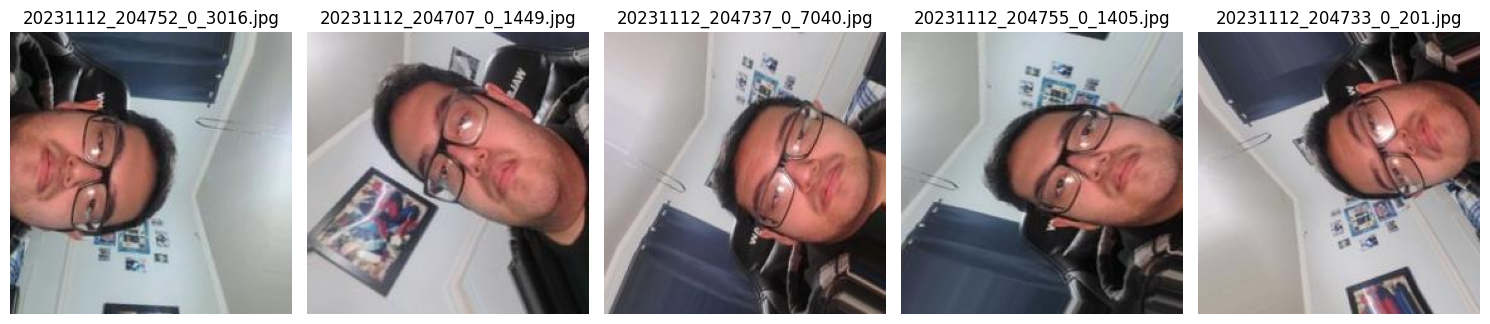

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/giannis_augmented


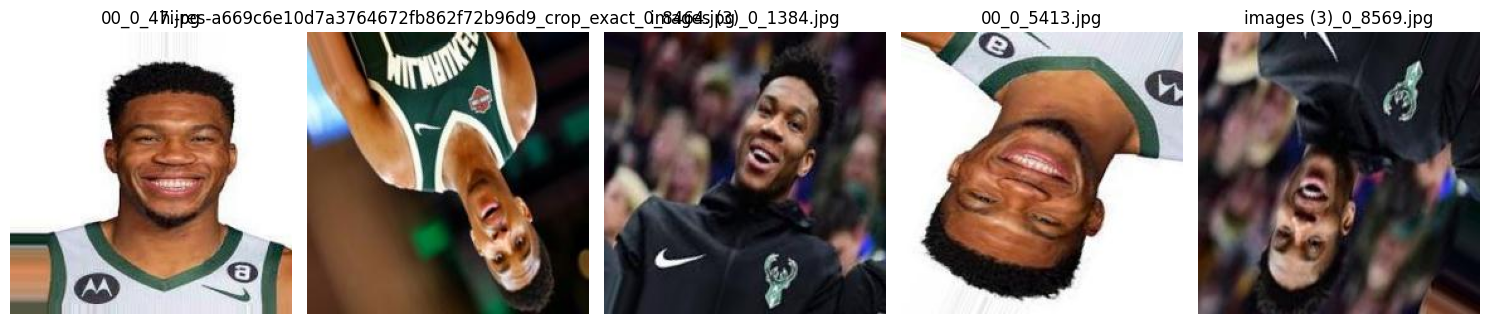

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/jokic_augmented


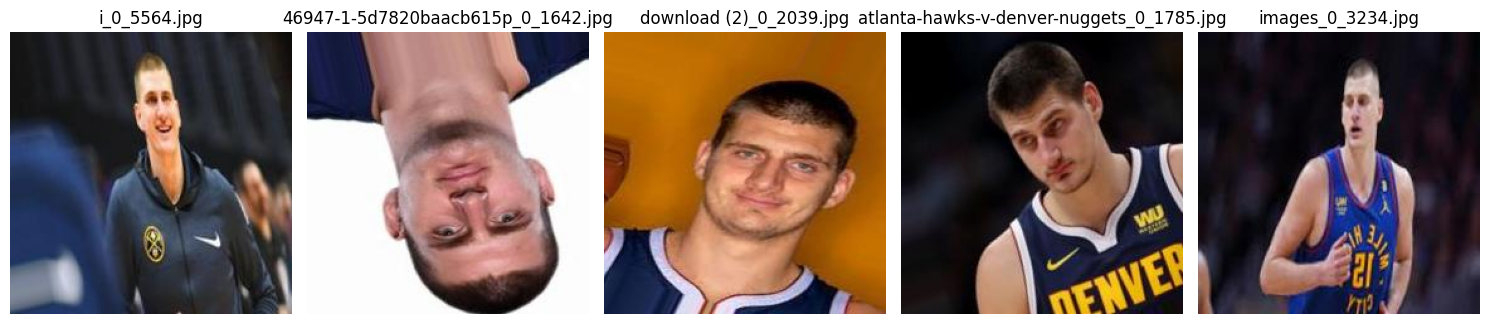

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/kobe_augmented


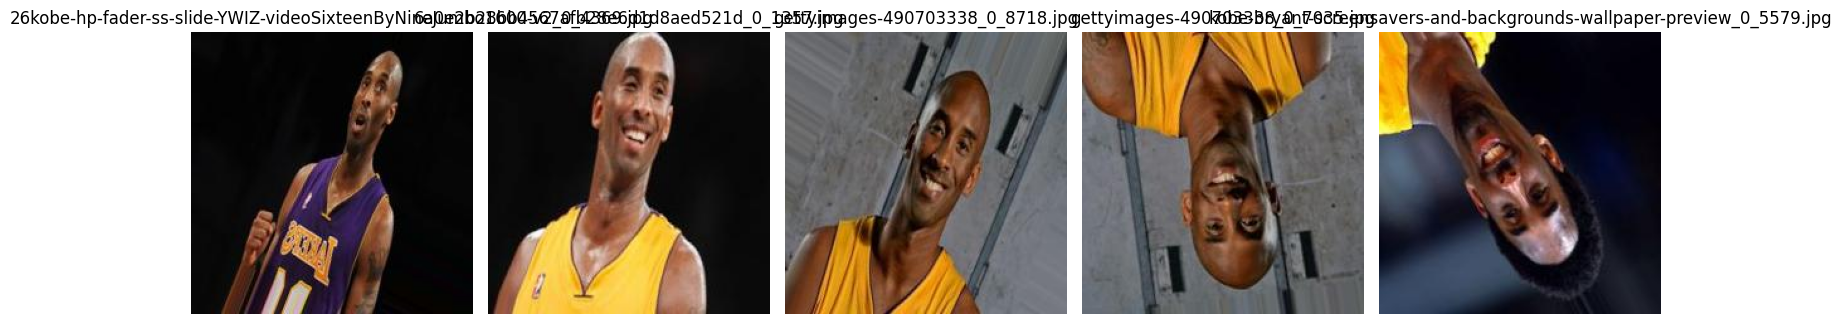

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/steph_augmented


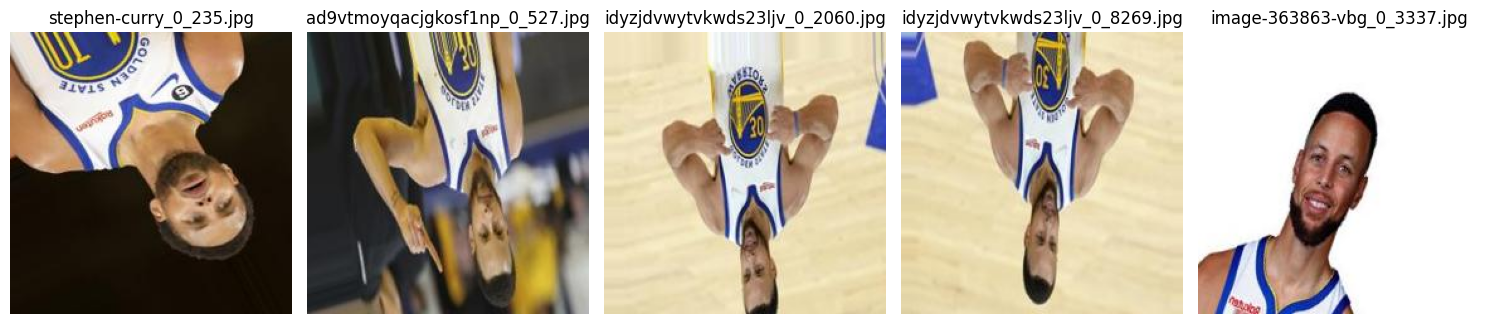

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/test_augmented


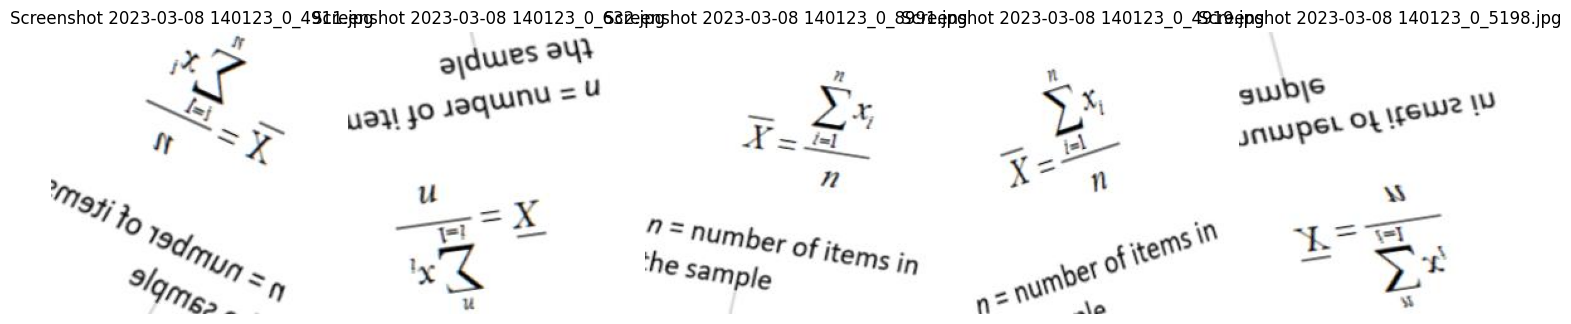

Visualizing random samples from: /mnt/c/users/efazh/DataCapstone/ProjectTortoise/data/timmy_augmented


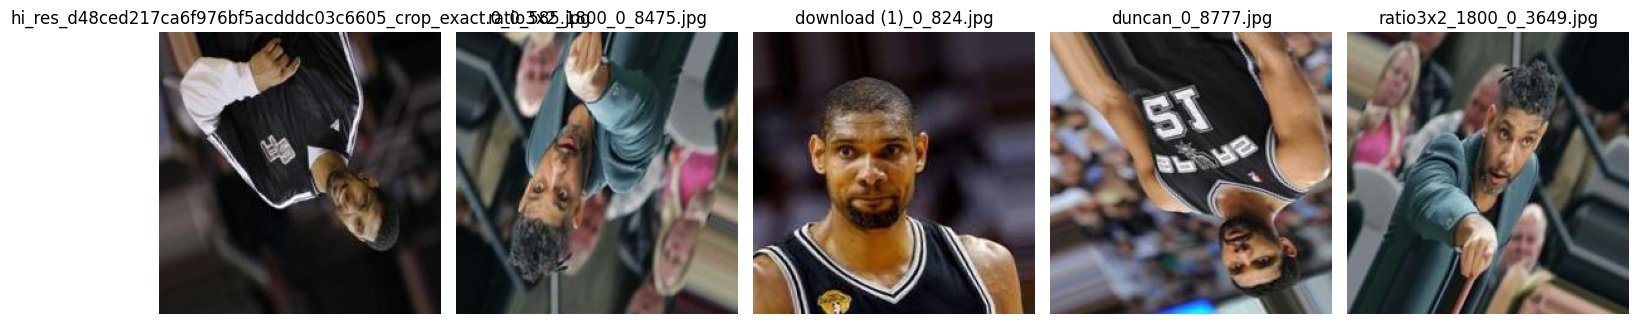

In [13]:
# Iterate through augmented folders and visualize random samples
for folder in folders:
    output_folder = os.path.join(parent_folder, folder + "_augmented")  # Path to augmented folder
    if os.path.exists(output_folder):  # Check if the augmented folder exists
        print(f"Visualizing random samples from: {output_folder}")
        visualize_random_augmented_images(output_folder, num_samples=5)  # Adjust the number of samples as needed